# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df_ionosphere = pd.read_csv('/content/drive/MyDrive/DL_Assignments_PIAIC/DataSets/ionosphere_data.csv')

In [103]:
df_ionosphere.head(15)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,-0.47929,0.78225,-0.50764,0.74628,-0.61436,0.57945,-0.68086,0.37852,-0.73641,0.36324,-0.76562,0.31898,-0.79753,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,-0.43569,0.94510,-0.40668,0.90392,-0.46381,0.98305,-0.35257,0.84537,-0.66020,0.75346,-0.60589,0.69637,-0.64225,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [104]:
df_ionosphere.shape

(351, 35)

In [105]:
df_ionosphere.isnull().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [106]:
df_ionosphere.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [107]:
# No. of Unique values in each columns
for f in df_ionosphere:
  print(f, len(df_ionosphere[f].unique()))

feature1 2
feature2 1
feature3 219
feature4 269
feature5 204
feature6 259
feature7 231
feature8 260
feature9 244
feature10 267
feature11 246
feature12 269
feature13 238
feature14 266
feature15 234
feature16 270
feature17 254
feature18 280
feature19 254
feature20 266
feature21 248
feature22 265
feature23 248
feature24 264
feature25 256
feature26 273
feature27 256
feature28 281
feature29 244
feature30 266
feature31 243
feature32 263
feature33 245
feature34 263
label 2


In [108]:
#droping feature2 column as having same values in all samples
df_ionosphere.drop(columns='feature2', inplace=True)

In [109]:
df_ionosphere.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [110]:
df_ionosphere.shape

(351, 34)

In [111]:
df_ionosphere.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df_ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

In [113]:
df_ionosphere['label'] = [1 if lbl == 'g' else 0 for lbl in df_ionosphere['label']]

In [114]:
df_ionosphere.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [115]:
train_data = df_ionosphere.sample(frac= 0.6, random_state=125)
test_data = df_ionosphere.drop(train_data.index)

In [116]:
train_label = train_data.loc[:,'label']
train_data.drop(columns='label', inplace=True)
test_label = test_data.loc[:,'label']
test_data.drop(columns='label', inplace=True)

In [117]:
display(train_data.head(), test_data.head())

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
270,1,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,1.00000,0.01419,0.96186,-0.01436,0.95947,-0.01671,0.98497,0.01002,0.91152,-0.08848,0.95016,-0.02364,0.94636,-0.02591,0.98164,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673
116,1,1.00000,-0.14754,1.00000,0.04918,0.57377,-0.01639,0.65574,0.01639,0.85246,-0.03279,0.72131,0.00000,0.68852,-0.16393,0.19672,-0.14754,0.65558,-0.17176,0.67213,0.03279,1.00000,-0.29508,0.31148,-0.34426,0.52385,-0.20325,0.32787,-0.03279,0.27869,-0.44262,0.49180,-0.06557
135,1,0.89706,0.38235,0.91176,0.37500,0.74265,0.67647,0.45588,0.77941,0.19118,0.88971,-0.02206,0.86029,-0.20588,0.82353,-0.37500,0.67647,-0.50000,0.47794,-0.73529,0.38235,-0.86029,0.08824,-0.74265,-0.12500,-0.67925,-0.24131,-0.55147,-0.42647,-0.44118,-0.50735,-0.28676,-0.56618
91,1,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,0.89514,-0.00763,-0.18494,0.63966,-0.20019,-0.68065,0.85701,-0.11344,0.77979,-0.15729,-0.06959,0.50810,-0.34128,0.80934,0.78932,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867
100,1,1.00000,-1.00000,0.00000,0.00000,0.77941,-0.99265,0.80882,0.55147,-0.41912,-0.94853,0.00000,0.00000,0.00000,0.00000,0.72059,-0.77206,0.73529,-0.60294,0.00000,0.00000,0.18382,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000


,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
6,1,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,-0.47929,0.78225,-0.50764,0.74628,-0.61436,0.57945,-0.68086,0.37852,-0.73641,0.36324,-0.76562,0.31898,-0.79753,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975
7,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
9,1,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065
10,1,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,1.00000,-0.41349,0.96232,-0.51874,0.90711,-0.59017,0.89230,-0.66474,0.69876,-0.70997,0.70645,-0.76320,0.63081,-0.80544,0.55867,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158


In [118]:
display(train_label.head(), test_label.head())

270    1
116    0
135    1
91     0
100    0
Name: label, dtype: int64

4     1
6     1
7     0
9     0
10    1
Name: label, dtype: int64

In [119]:
train_data.shape

(211, 33)

In [120]:
test_data.shape

(140, 33)

In [121]:
train_label.shape

(211,)

In [122]:
test_label.shape

(140,)

# To Numpy 

In [123]:
train_data = train_data.to_numpy()
train_label = train_label.to_numpy().astype('float32')
test_data = test_data.to_numpy()
test_label = test_label.to_numpy().astype('float32')

In [124]:
print(train_data.dtype)
print(train_label.dtype)
print(test_label.dtype)
print(test_data.dtype)

float64
float32
float32
float64


# Building Model

In [125]:
Network = Sequential()
Network.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
Network.add(Dropout(0.3))
Network.add(Dense(64, activation='relu'))
Network.add(Dropout(0.3))
Network.add(Dense(1,  activation='sigmoid'))
Network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               4352      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [126]:
Network.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = Network.fit(train_data, train_label, validation_split=0.25, epochs= 80, batch_size = 32)

Epoch 1/80
5/5 [==============================] - 1s 56ms/step - loss: 0.6204 - accuracy: 0.6319 - val_loss: 0.4577 - val_accuracy: 0.7925
Epoch 2/80
5/5 [==============================] - 0s 15ms/step - loss: 0.5120 - accuracy: 0.7633 - val_loss: 0.4123 - val_accuracy: 0.8679
Epoch 3/80
5/5 [==============================] - 0s 12ms/step - loss: 0.4699 - accuracy: 0.8349 - val_loss: 0.3761 - val_accuracy: 0.8868
Epoch 4/80
5/5 [==============================] - 0s 13ms/step - loss: 0.4414 - accuracy: 0.7921 - val_loss: 0.3493 - val_accuracy: 0.8868
Epoch 5/80
5/5 [==============================] - 0s 13ms/step - loss: 0.4169 - accuracy: 0.8541 - val_loss: 0.3218 - val_accuracy: 0.8868
Epoch 6/80
5/5 [==============================] - 0s 14ms/step - loss: 0.3958 - accuracy: 0.8814 - val_loss: 0.2976 - val_accuracy: 0.9245
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.3159 - accuracy: 0.9041 - val_loss: 0.2768 - val_accuracy: 0.9245
Epoch 8/80
5/5 [===========

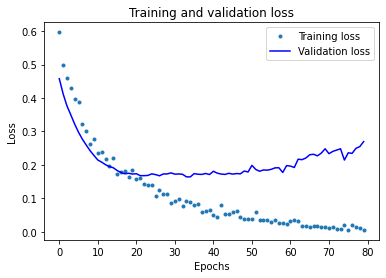

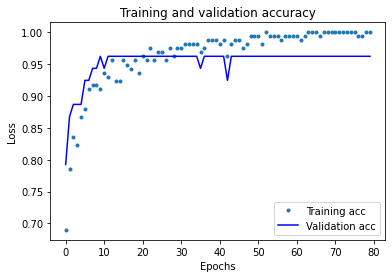

In [127]:
history_dictionary = history.history
loss_values = history_dictionary['loss']
val_loss_values = history_dictionary['val_loss']
epochs = range(80)
plt.plot(epochs, loss_values, '.', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dictionary['accuracy']
val_acc_values = history_dictionary['val_accuracy']
plt.plot(epochs, acc_values, '.', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [128]:
Network_Score = Network.evaluate(test_data, test_label)
Network_Score

5/5 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.9286


[0.278704971075058, 0.9285714030265808]

In [129]:
pred=Network.predict(test_data)
y_pred = (pred> 0.5)

In [130]:
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [131]:
tf.math.confusion_matrix(
    test_label, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,name=None)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[46,  9],
       [ 1, 84]], dtype=int32)>

In [132]:
np.count_nonzero(y_pred)

93